# Machine Learning: Assignment 5 
## SVM plus Other Classification Method (max. 10p)

The dataset for the assignment is "Date Fruit Datasets" file you can find from [Date_Fruit_Datasets.xlsx](data/Date_Fruit_Datasets.xlsx), which contains 898 rows and 34 columns of data about dates and a column telling the species of dates.

There are **seven** (**7**) date fruit species in the dataset, so this is **multi-class classification problem**.

More information about the data and related research: [https://www.muratkoklu.com/datasets/](https://www.muratkoklu.com/datasets/).


In [1]:
# Write Your information in here
student_name = 'Juuso Leppänen'
student_email = "ad1885@student.jamk.fi"

## Assignment 5.1
### Topic: Data Preprocessing (2 points)
The dataset has a class variable (*target*) in the last column.

Let's do the following preprocessing steps with the dataset:

1. Load the data into the `DataFrame`.
2. Name the columns of the `DataFrame` according to the dataset.
3. Preprocess the dataset
   * Optimize the data input to the machine learning model
   * You can remove "unnecessary features" at your discretion
   * Handling of abnormal (outliers) or empty data values
   * Remember that all categories should be numeric
4. Scale column values by normalizing them.

In [20]:
# TODO: Write your code in this cell

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
df = pd.read_excel("Date_Fruit_Datasets.xlsx")

# Separate features and target
X = df.iloc[:, :-1]   # all columns except last (features)
y = df.iloc[:, -1]    # last column (target)

# Fill missing values
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())  # numeric columns

categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].fillna('Unknown')       # categorical columns

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target labels
y = LabelEncoder().fit_transform(y)

In [22]:
# TODO: Plotting features 
# Scale features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combine scaled features and target into final df (optional, for assignment requirement)
df = pd.concat([X_scaled, pd.Series(y, name='Class')], axis=1)

In [24]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The DataFrame should be in the df variable.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')
First row by position: AREA             0.772274
PERIMETER        0.772079
MAJOR_AXIS       0.565604
MINOR_AXIS       0.841941
ECCENTRICITY     0.446429
EQDIASQ          0.871512
SOLIDITY         0.983209
CONVEX_AREA      0.767108
EXTENT           0.787438
ASPECT_RATIO     0.000435
ROUNDNESS        0.958972
COMPACTNESS      0.899569
SHAPEFACTOR_1    0.000489
SHAPEFACTOR_2    0.125000
SHAPEFACTOR_3    0.816588
SHAPEFACTOR_4    0.975690
MeanRR           0.673522
M

## Assignment 5.2: Training and Testing Data (2 points)

Split the data into training and testing data using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of the `scikit-learn` library.
Put *75%* of the data in training data.

1. Save the training data and its class variable to the variables `X_train`, `y_train`,
2. Save the test data to the variables `X_test`, `y_test`.

If you think there are unnecessary variables in the data, you should remove them at this stage.

Use the number `1550` as the random seed and the size of the test data *25%*.

In [42]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# TODO: Write your implementation in this cell.
from sklearn.model_selection import train_test_split

# TODO: Choose the appropriate scaling method
X = df.iloc[:, :-1]  # all columns except 'Class'
y = df['Class']      # target column

# Split data: 75% train, 25% test, random_state=1550
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1550, stratify=y
)

# TODO: Normalize the data
# Initialize scale
scaler = MinMaxScaler()

# Fit scaler on training data and transform
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform test data using the same scaler
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [44]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.

df_X_train = pd.DataFrame(X_train, columns=X.columns)
#
print(len(df))
print(len(X_train))
print(len(X_test))
#
df_X_train.head()

898
673
225


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,0.309546,0.305931,0.248225,0.486234,0.630342,0.529528,0.949005,0.310360,0.765630,0.000874,...,0.186223,0.099420,0.055736,0.028741,0.657809,0.598682,0.684734,0.912328,0.873187,0.829580
1,0.324377,0.372859,0.305543,0.526587,0.636142,0.543461,0.391791,0.358051,0.546635,0.000894,...,0.231305,0.032576,0.016865,0.009192,0.676153,0.656314,0.750324,0.827859,0.732981,0.651982
2,0.959024,0.875249,0.655599,0.912249,0.492063,0.978012,0.976990,0.958155,0.721558,0.000519,...,0.512884,0.235221,0.229057,0.115497,0.738920,0.663728,0.617116,0.357594,0.310950,0.346662
3,0.184643,0.112615,0.086999,0.389324,0.563339,0.395809,0.977612,0.184052,0.787154,0.000679,...,0.153394,0.047946,0.046961,0.020737,0.850171,0.831944,0.856138,0.749920,0.687347,0.670943
4,0.269150,0.261564,0.221777,0.442213,0.671856,0.489811,0.971393,0.268804,0.267509,0.001027,...,0.207624,0.068994,0.029460,0.009428,0.701067,0.674606,0.724777,0.907888,0.826011,0.815379


## Assignment 5.3: Implement Support Vector Machine Classification (2 points)

1. Use the `scikit-learn` library's *Linear Support Vector Classification* function to train a classifier with your training data that classifies each date fruit species.

2. Create predictions for the data points of your test data in the `y_pred` variable.

3. Use the `metrics` module to make a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for the predictions of your test data. Save results to the `cr` variable.

4. Use the `metrics` module to make a **confusion matrix** and store it in the `cm` variable.

In [54]:
# TODO: Write your implementation in this cell.
# TODO: use LinearSVC.
cr = cm = None
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Create the LinearSVC model
svm_model = LinearSVC(random_state=1550, max_iter=5000, dual=False)  # increase max_iter if convergence warning

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate classification report and confusion matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [56]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# The results are in cm and cr variables.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.78      0.56      0.65        25
           2       0.93      0.98      0.95        51
           3       0.88      0.78      0.82        18
           4       0.86      1.00      0.92        42
           5       0.98      1.00      0.99        50
           6       0.79      0.83      0.81        23

    accuracy                           0.89       225
   macro avg       0.88      0.84      0.85       225
weighted avg       0.89      0.89      0.89       225

Confusion matrix:
 [[12  0  0  2  2  0  0]
 [ 0 14  4  0  2  0  5]
 [ 0  1 50  0  0  0  0]
 [ 1  0  0 14  2  1  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 50  0]
 [ 0  3  0  0  1  0 19]]


## Assignment 5.4: Comparison with another ML method  (2 points)

For comparison, try to develop the model using another classification method:
* The method can be **RandomForest** (or if you want **DecisionTree** etc., but still justify your choice).

So you can freely select the ML classification method used in this comparison.

In [58]:
# TODO: Write your implementation in this cell.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# TODO: Implementation of another Machine Learning Classification method.
# TODO: The method can be RandomForest or any other method that works with this data "well enough".

# Initialize RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=1550)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Random Forest Confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.72      0.84      0.78        25
           2       0.96      0.96      0.96        51
           3       0.89      0.89      0.89        18
           4       0.93      0.98      0.95        42
           5       1.00      1.00      1.00        50
           6       0.85      0.74      0.79        23

    accuracy                           0.92       225
   macro avg       0.90      0.88      0.89       225
weighted avg       0.92      0.92      0.92       225

Random Forest Confusion matrix:
[[12  0  0  2  2  0  0]
 [ 0 21  2  0  0  0  2]
 [ 0  2 49  0  0  0  0]
 [ 1  0  0 16  1  0  0]
 [ 0  0  0  0 41  0  1]
 [ 0  0  0  0  0 50  0]
 [ 0  6  0  0  0  0 17]]


## Assignment 5.5: Analysis of the results (2 points)

Verbally interpret the obtained results from both ML methods.
* How well the support vector did in the classification
* How well the another ML method did in the classification

Let's do comparison of Different Classification Models used in this assignment.
* Compare the classification results of SVM and Selected Classification models.
* Compare the obtained results and interpret the results verbally.
* Compare the **accuracy** and **confusion matrix** of the classification results for both methods.

# Support Vector Machine (SVM):
Accuracy: ~89%
Performs well on most classes (best class 2 and 5).
Struggles with classes 1 and 3.
Confusion matrix shows misclassifications between similar classes.

# Random Forest:
Accuracy: ~92%
Performs amazingly on F1-scores most classes (0.78–1.0).
Misclassifications are fewer, especially on class 1.
Confusion matrix shows predictions match true labels more consistently.

# Comparison:
Random Forest slightly outperforms SVM in accuracy and overall F1-score.
Both models handle most of classes well, but SVM is more sensitive to overlapping features or class imbalance.
Random Forest’s ensemble approach improves robustness and reduces misclassifications.

SVM Confusion Matrix:
 [[12  0  0  2  2  0  0]
 [ 0 14  4  0  2  0  5]
 [ 0  1 50  0  0  0  0]
 [ 1  0  0 14  2  1  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 50  0]
 [ 0  3  0  0  1  0 19]]
Random Forest Confusion Matrix:
 [[12  0  0  2  2  0  0]
 [ 0 21  2  0  0  0  2]
 [ 0  2 49  0  0  0  0]
 [ 1  0  0 16  1  0  0]
 [ 0  0  0  0 41  0  1]
 [ 0  0  0  0  0 50  0]
 [ 0  6  0  0  0  0 17]]


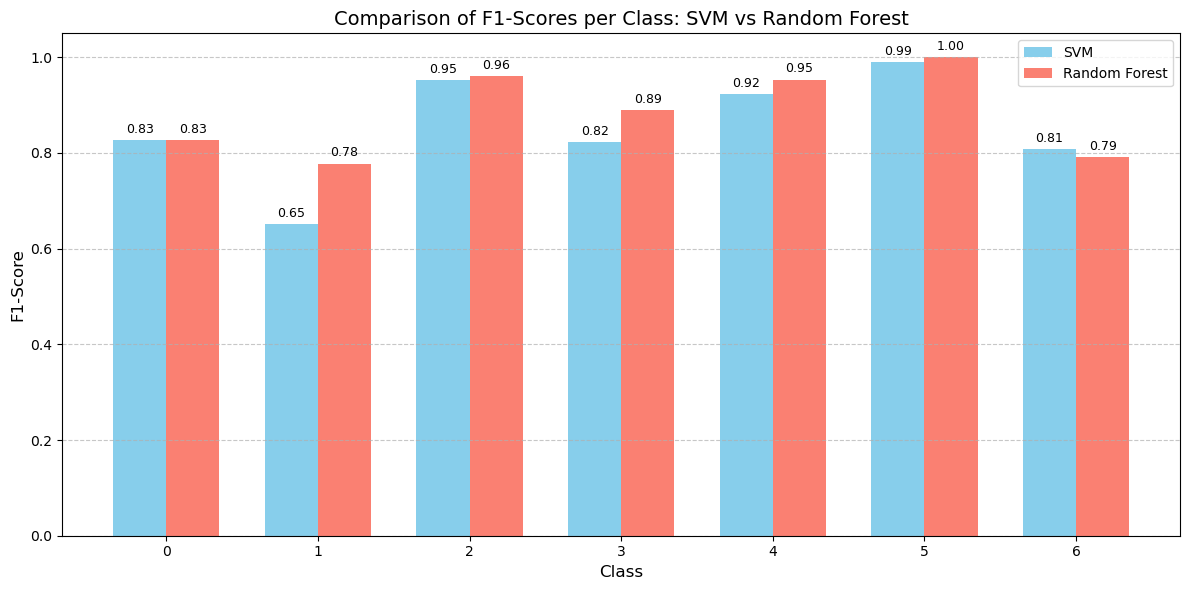

In [66]:
# TODO: Compare the accuracy of the classification results of both classification methods.
# TODO: Compare the confusion matrix of both classification methods with each other.
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Confusion matrices (optional check)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("SVM Confusion Matrix:\n", cm_svm)
print("Random Forest Confusion Matrix:\n", cm_rf)

# Classification reports
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract F1-scores per class
classes = [str(i) for i in range(len(report_svm)-3)]  # excluding avg rows
f1_svm = [report_svm[c]['f1-score'] for c in classes]
f1_rf = [report_rf[c]['f1-score'] for c in classes]

# Bar chart
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, f1_svm, width, label='SVM', color='skyblue')
rects2 = ax.bar(x + width/2, f1_rf, width, label='Random Forest', color='salmon')

# Add labels on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Labels, title, grid, and legend
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Comparison of F1-Scores per Class: SVM vs Random Forest', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

<font color="red">PLEASE WRITE YOUR EXPLANATION HERE.</font>

Q: Are there other good classification methods to apply with this dataset or any other way to improve the classification results?

# Other Classification Methods:

Gradient Boosting (XGBoost): Often achieves higher accuracy than Random Forest on structured data.
Neural Networks (MLPClassifier): Can capture complex nonlinear relationships in the data.

# Ways to Improve Classification Results:

Feature Engineering: Transform or create features to better represent the data.
Hyperparameter Tuning: Optimize model parameters using GridSearchCV or RandomizedSearchCV.
Class Imbalance Handling: Use oversampling, SMOTE, or class weights for underrepresented classes.
Cross-Validation: Apply k-fold cross-validation to get robust performance estimates and avoid overfitting.